In [1]:
%matplotlib notebook
import pandas as pd
from datetime import date, datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
### Use this cell to split data by a specified date range
### data starts on 2020-06-03
### M1 fall term classes started on 2020-08-25
start_date = pd.to_datetime('2020-08-25')
end_date = pd.to_datetime('2020-10-15')
#end_date = date.today()

In [3]:
#import data and rename columns
#below is path if pulling from local file
path = os.path.abspath("Med_School_Time_Tracking.csv")

#below is path if pulling directly from Google Sheets URL
#path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTcdP3ne8G2iQ4YBAN-QBPyJkEY7bzHbwprXVEdJhZGDRXLA0nxKiG54CZMcXSR5StFtrKst5x5pKXd/pub?output=csv'
data = pd.read_csv(path)
    
data = data.rename(columns = {'Enter date for time entered': 'Date', 
                                  'Class Time':'Class', 'Lab Time':'Lab',
                                  'Anki (as recorded in app)':'Anki',
                                  'Other (Group Study, Committees, Shadowing, etc.)':'Other',
                                  'Self Study (not including Anki)':'Self-Study'})
    
df = pd.DataFrame(data)
df.tail()

,Timestamp,Date,Class,Lab,Anki,Volunteering,Research,Other,Self-Study
203,12/7/2020 20:15:20,12/7/2020,120.0,NaN,110.0,NaN,NaN,NaN,225.0
204,12/8/2020 21:29:49,12/8/2020,NaN,NaN,105.0,NaN,NaN,60.0,315.0
205,12/9/2020 21:06:41,12/9/2020,140.0,NaN,35.0,NaN,NaN,90.0,25.0
206,12/10/2020 18:33:34,12/10/2020,NaN,NaN,30.0,NaN,NaN,295.0,180.0
207,12/11/2020 9:14:35,12/11/2020,70.0,NaN,23.0,NaN,NaN,60.0,NaN


In [4]:
#convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

#returns day of week as an integer where Monday is 0 and Sunday is 6
df['Dow'] = df['Date'].dt.weekday

#returns month as an integer where Jan is 1 and Dec is 12
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
#df.tail()

In [5]:
#sets index per start and end date
index = pd.DatetimeIndex(df['Date'])
df = df.set_index(index)
df = df[start_date:end_date]
df.shape

(52, 12)

In [6]:
dayz = len(df)

In [7]:
#turn date into string for graphs
startstr = str(start_date)
endstr = str(end_date)
startstr = startstr[0:10]
endstr = endstr[0:10]
date_rangestr = startstr + ' to ' + endstr
date_rangestr

'2020-08-25 to 2020-10-15'

In [8]:
# add in sum row
col_list = list(df)
col_list.remove('Dow')
col_list.remove('Month')
col_list.remove('Year')
#col_list.remove('Date')
col_list

['Timestamp',
 'Date',
 'Class',
 'Lab',
 'Anki',
 'Volunteering',
 'Research',
 'Other',
 'Self-Study']

In [9]:
df['Sum'] = df[col_list].sum(axis=1)
df.tail()

,Timestamp,Date,Class,Lab,Anki,Volunteering,Research,Other,Self-Study,Dow,Month,Year,Sum
Date,,,,,,,,,,,,,
2020-10-11,10/11/2020 21:22:21,2020-10-11,NaN,NaN,81.0,NaN,NaN,NaN,579.0,6,10,2020,660.0
2020-10-12,10/13/2020 12:03:58,2020-10-12,170.0,NaN,109.0,NaN,NaN,NaN,326.0,0,10,2020,605.0
2020-10-13,10/14/2020 7:17:05,2020-10-13,NaN,NaN,60.0,NaN,NaN,NaN,525.0,1,10,2020,585.0
2020-10-14,10/14/2020 20:03:08,2020-10-14,240.0,NaN,141.0,NaN,NaN,NaN,145.0,2,10,2020,526.0
2020-10-15,10/15/2020 21:14:14,2020-10-15,30.0,NaN,65.0,NaN,NaN,NaN,330.0,3,10,2020,425.0


In [10]:
#sort by dow for figure
df_dow = df.groupby(['Dow'])['Sum'].sum().reset_index(name = 'Total').set_index(['Dow'])
df_dow1 = df.groupby(['Dow'])['Sum'].mean().reset_index(name = 'Total').set_index(['Dow'])
df_dow1.tail()

,Total
Dow,
2,612.625000
3,538.500000
4,432.428571
5,240.571429
6,302.857143


<IPython.core.display.Javascript object>


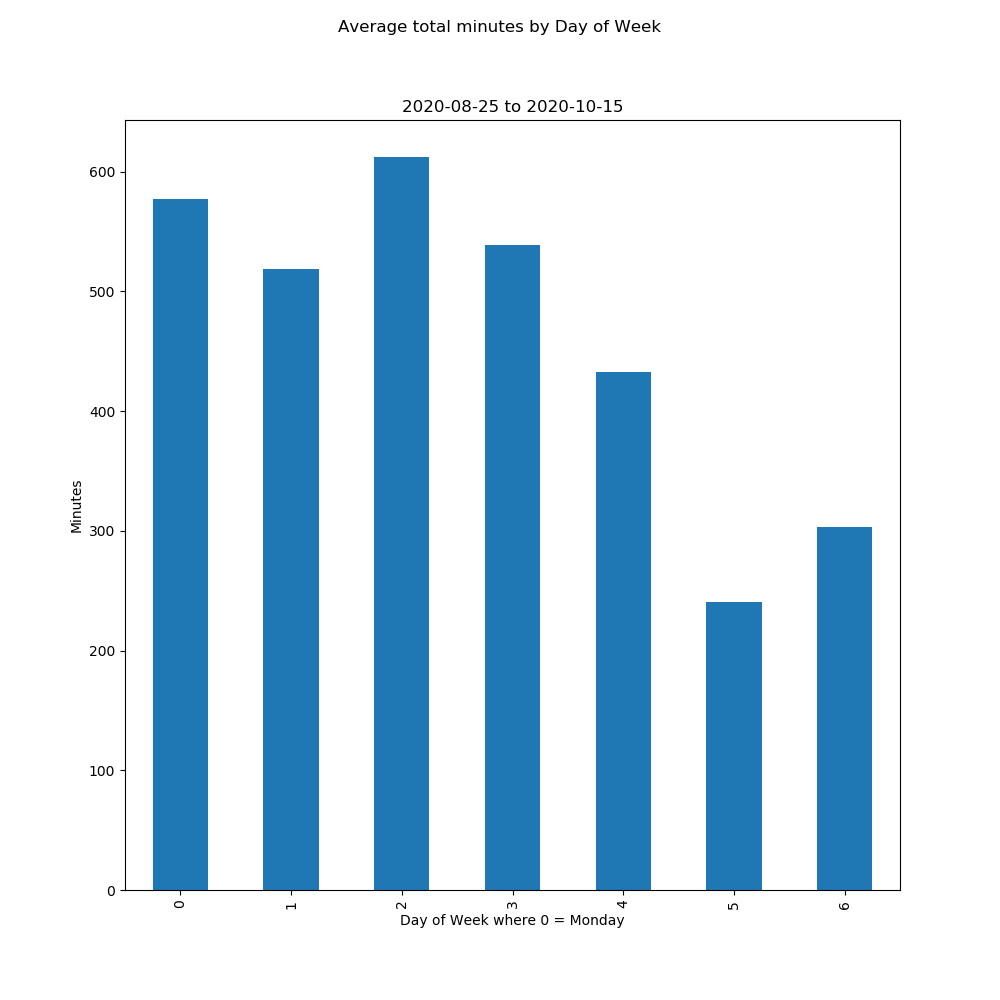

In [11]:
df_dow1.plot.bar(legend = False,figsize = (10,10))
plt.suptitle('Average total minutes by Day of Week')
plt.title(date_rangestr)
plt.xlabel('Day of Week where 0 = Monday')
plt.ylabel('Minutes')
plt.savefig('1total_dow.png')

In [12]:
#sum the months for total by month figure
df_month = df.groupby(['Month'])['Sum'].sum().reset_index(name = 'Total').set_index(['Month'])
#convert minutes to hours
df_month['Total'] = df_month['Total']/60
df_month
#average the months so that this script works year over year
df_month1 = df_month.groupby(['Month'])['Total'].mean().reset_index(name = 'Total').set_index(['Month'])
df_month1.tail()

,Total
Month,
8,43.000000
9,228.166667
10,132.700000


<IPython.core.display.Javascript object>


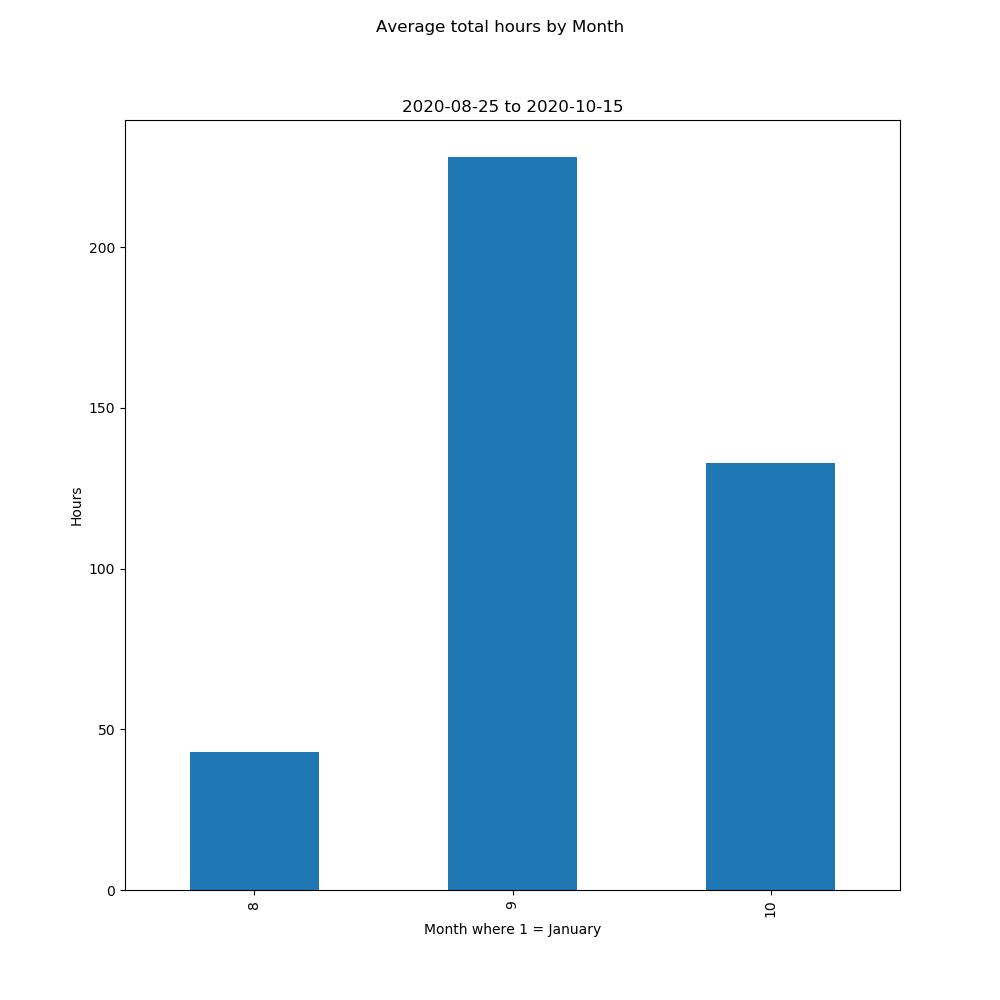

In [13]:
df_month1.plot.bar(legend = False,figsize = (10,10))
plt.suptitle('Average total hours by Month')
plt.title(date_rangestr)
plt.xlabel('Month where 1 = January')
plt.ylabel('Hours')
plt.savefig('1total_month.png')

In [14]:
#sum the years for total by years figure
df_year = df.groupby(['Year'])['Sum'].sum().reset_index(name = 'Total').set_index(['Year'])
#convert minutes to hours
df_year['Total'] = df_year['Total']/60
#average the years so that this script works year over year
df_year1 = df_year.groupby(['Year'])['Total'].mean().reset_index(name = 'Total').set_index(['Year'])
#df_year.tail()

<IPython.core.display.Javascript object>


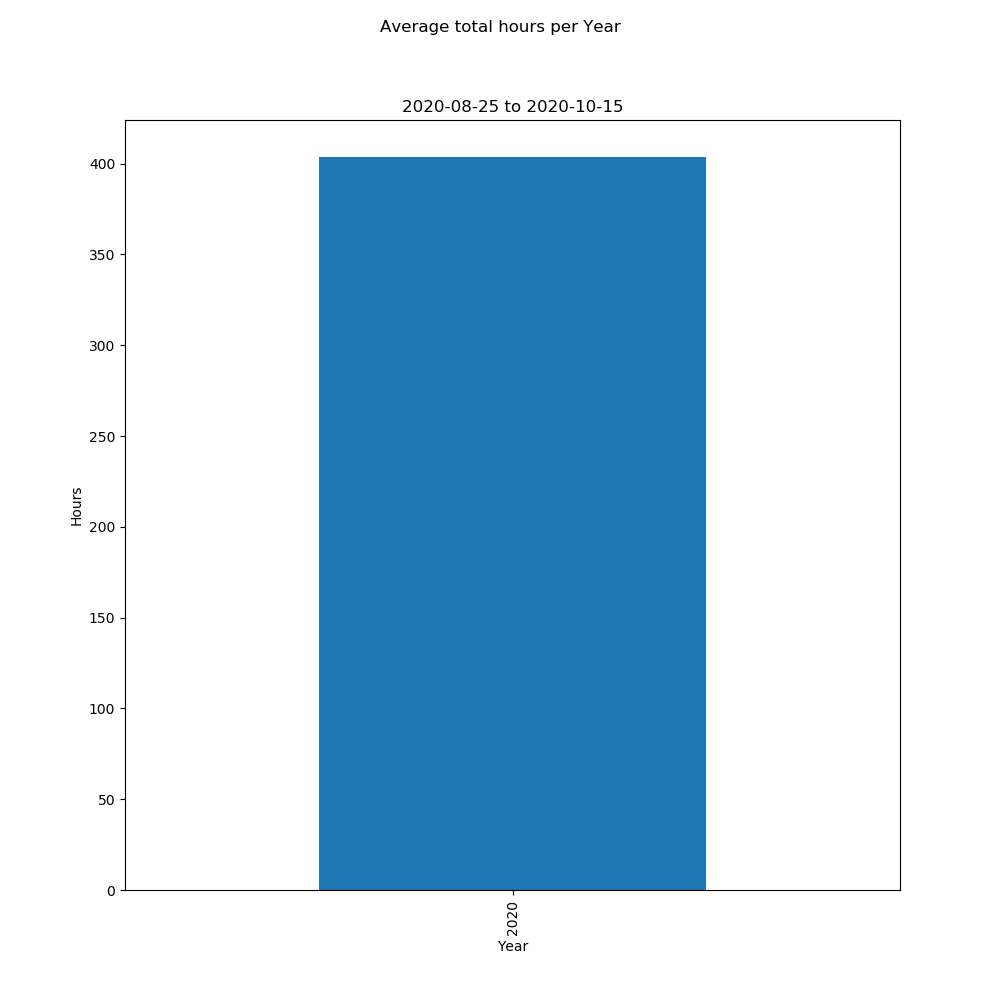

In [15]:
df_year1.plot.bar(legend = False,figsize = (10,10))
plt.suptitle('Average total hours per Year')
plt.title(date_rangestr)
plt.xlabel('Year')
plt.ylabel('Hours')
plt.savefig('1total_year.png')

In [16]:
#create new dataframe with activiies indexed by dow for figure
cat_dow = df.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],index = ['Dow'])
cat_dow1 = df.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],index = ['Dow'],
                          aggfunc='sum')
cat_dow1

,Anki,Class,Lab,Other,Research,Self-Study,Volunteering
Dow,,,,,,,
0,976.0,1015.0,0.0,236.0,70.0,1746.0,0.0
1,1059.0,1502.0,0.0,70.0,40.0,1478.0,0.0
2,960.0,2177.0,0.0,196.0,310.0,1258.0,0.0
3,806.0,2339.0,0.0,82.0,112.0,969.0,0.0
4,763.0,1368.0,0.0,503.0,20.0,373.0,0.0
5,760.0,47.0,0.0,45.0,0.0,832.0,0.0
6,619.0,262.0,0.0,15.0,15.0,1209.0,0.0


<IPython.core.display.Javascript object>


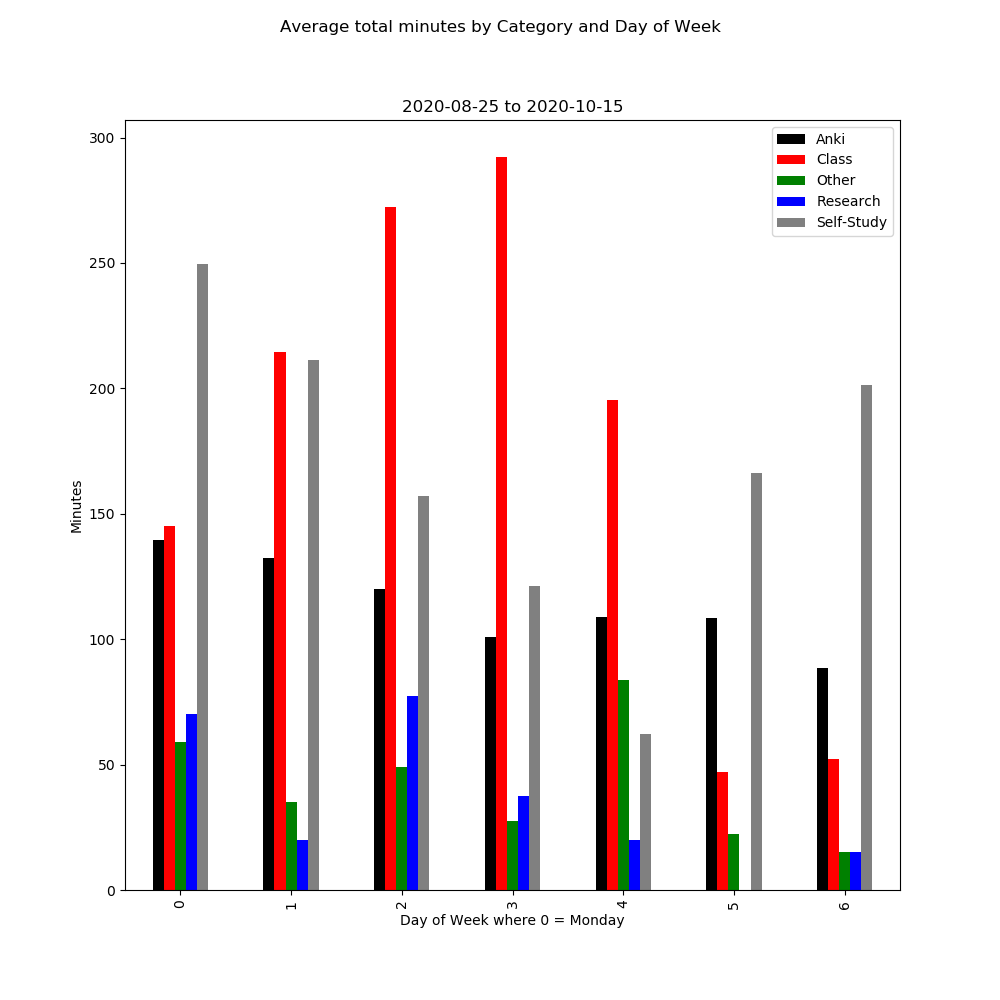

In [17]:
cat_dow.plot.bar(color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'],figsize = (10,10))
plt.suptitle('Average total minutes by Category and Day of Week')
plt.title(date_rangestr)
plt.xlabel('Day of Week where 0 = Monday')
plt.ylabel('Minutes')
plt.legend(loc = 'best')
plt.savefig('1cat_dow.png')

In [18]:
#create new dataframe with activiies indexed by month for figure
cat_month1 = df.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other','Sum'],
                           index = ['Month'], aggfunc='sum')
cat_month = cat_month1.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],
                           index = ['Month'])
#convert minutes to hours
cat_month['Anki'] = cat_month['Anki']/60
cat_month['Class'] = cat_month['Class']/60
cat_month['Lab'] = cat_month['Lab']/60
cat_month['Research'] = cat_month['Research']/60
cat_month['Self-Study'] = cat_month['Self-Study']/60
cat_month['Volunteering'] = cat_month['Volunteering']/60
cat_month['Other'] = cat_month['Other']/60
cat_month

,Anki,Class,Lab,Other,Research,Self-Study,Volunteering
Month,,,,,,,
8,9.316667,19.066667,0.0,2.916667,3.366667,8.333333,0.0
9,55.050000,96.333333,0.0,11.083333,6.083333,59.616667,0.0
10,34.683333,29.766667,0.0,5.116667,0.000000,63.133333,0.0


<IPython.core.display.Javascript object>


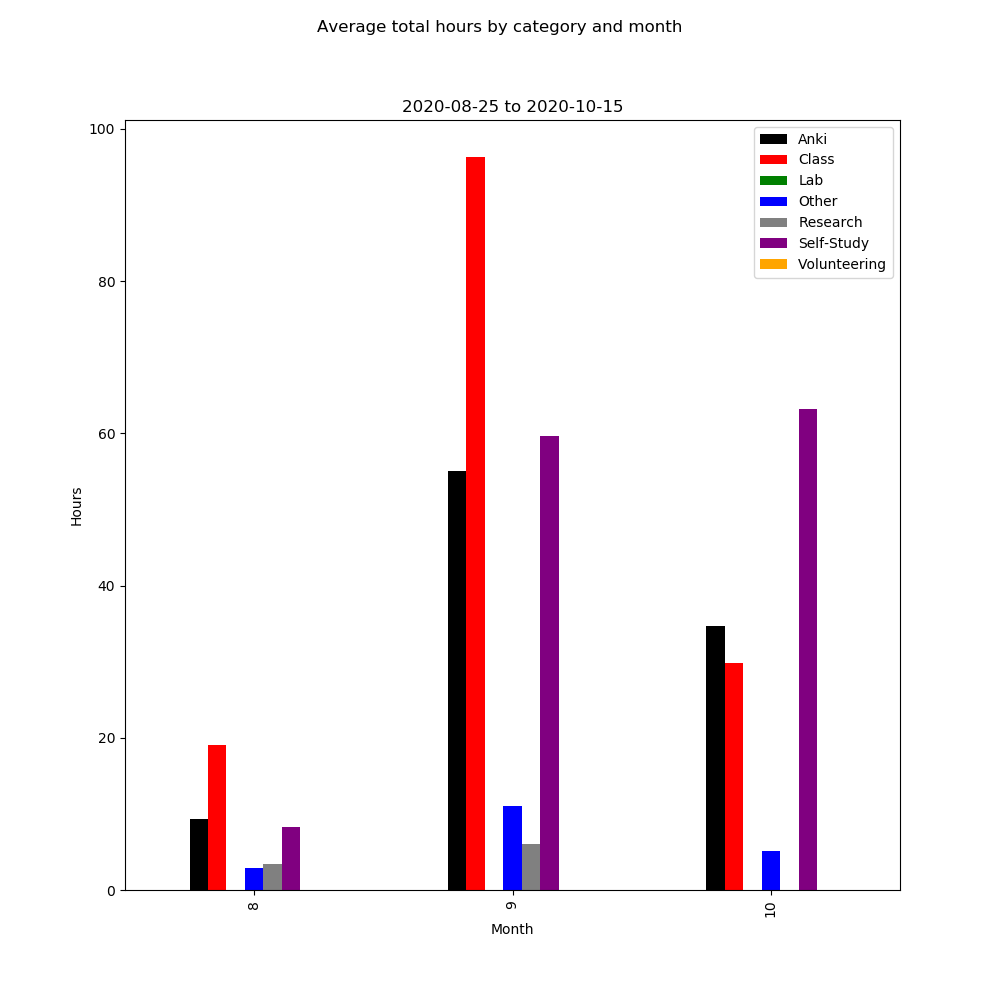

In [19]:
cat_month.plot.bar(color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'],figsize = (10,10))
plt.suptitle('Average total hours by category and month')
plt.title(date_rangestr)
plt.xlabel('Month')
plt.ylabel('Hours')
plt.legend(loc = 'best')
plt.savefig('1cat_month.png')

In [20]:
#create new dataframe with activiies indexed by year for figure
cat_year1 = df.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other','Sum'],
                           index = ['Year'], aggfunc='sum')
cat_year = cat_year1.pivot_table(['Anki','Class','Lab','Research','Self-Study','Volunteering','Other'],
                           index = ['Year'])
#convert minutes to hours
cat_year['Anki'] = cat_year['Anki']/60
cat_year['Class'] = cat_year['Class']/60
cat_year['Lab'] = cat_year['Lab']/60
cat_year['Research'] = cat_year['Research']/60
cat_year['Self-Study'] = cat_year['Self-Study']/60
cat_year['Volunteering'] = cat_year['Volunteering']/60
cat_year['Other'] = cat_year['Other']/60
#cat_year

<IPython.core.display.Javascript object>


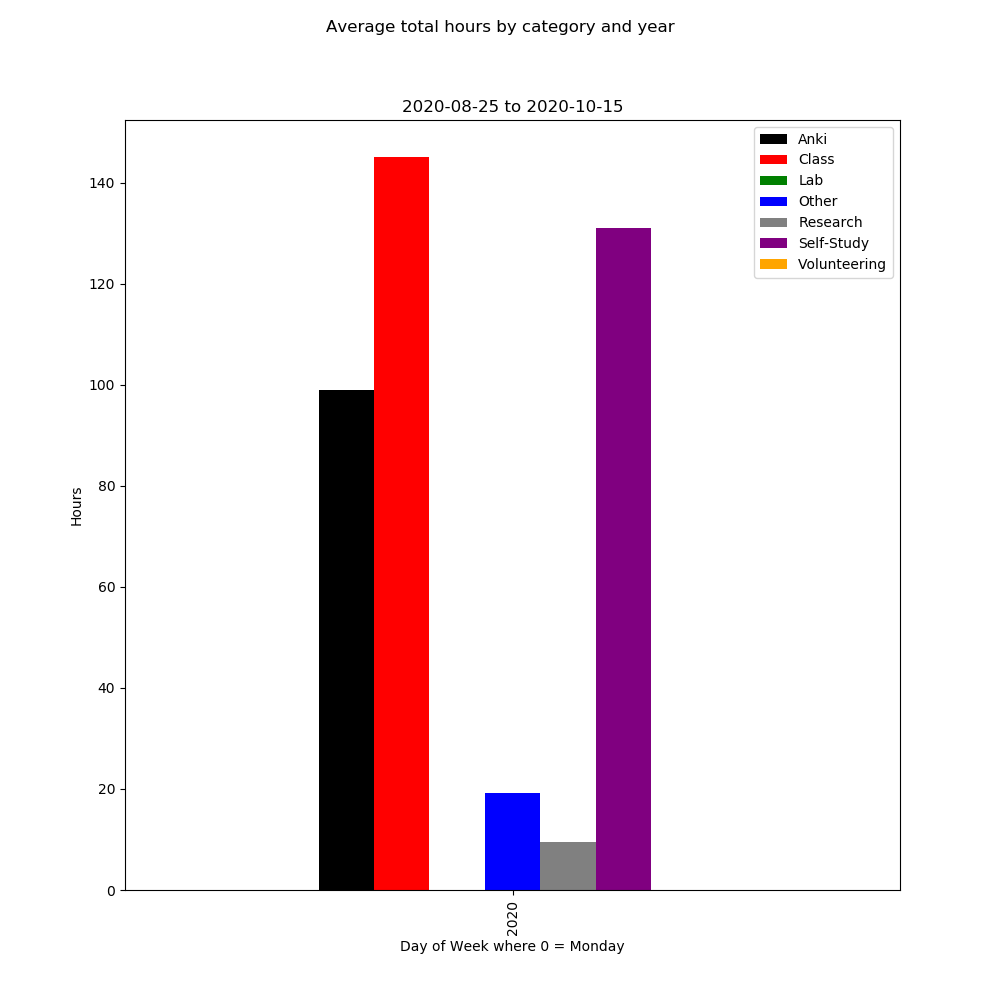

In [21]:
cat_year.plot.bar(color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'],figsize = (10,10))
plt.suptitle('Average total hours by category and year')
plt.title(date_rangestr)
plt.xlabel('Day of Week where 0 = Monday')
plt.ylabel('Hours')
plt.legend(loc = 'best')
plt.savefig('1cat_year.png')

In [22]:
df.tail()

,Timestamp,Date,Class,Lab,Anki,Volunteering,Research,Other,Self-Study,Dow,Month,Year,Sum
Date,,,,,,,,,,,,,
2020-10-11,10/11/2020 21:22:21,2020-10-11,NaN,NaN,81.0,NaN,NaN,NaN,579.0,6,10,2020,660.0
2020-10-12,10/13/2020 12:03:58,2020-10-12,170.0,NaN,109.0,NaN,NaN,NaN,326.0,0,10,2020,605.0
2020-10-13,10/14/2020 7:17:05,2020-10-13,NaN,NaN,60.0,NaN,NaN,NaN,525.0,1,10,2020,585.0
2020-10-14,10/14/2020 20:03:08,2020-10-14,240.0,NaN,141.0,NaN,NaN,NaN,145.0,2,10,2020,526.0
2020-10-15,10/15/2020 21:14:14,2020-10-15,30.0,NaN,65.0,NaN,NaN,NaN,330.0,3,10,2020,425.0


In [23]:
#create new dataframe for time by date
df.rename(columns = {'Date':'d'}, inplace = True)
x = df['d'].dt.strftime('%x')
df_date = df.pivot_table(['Sum'],index = [x])
df_date.tail()

,Sum
d,
10/11/20,660.0
10/12/20,605.0
10/13/20,585.0
10/14/20,526.0
10/15/20,425.0


<IPython.core.display.Javascript object>


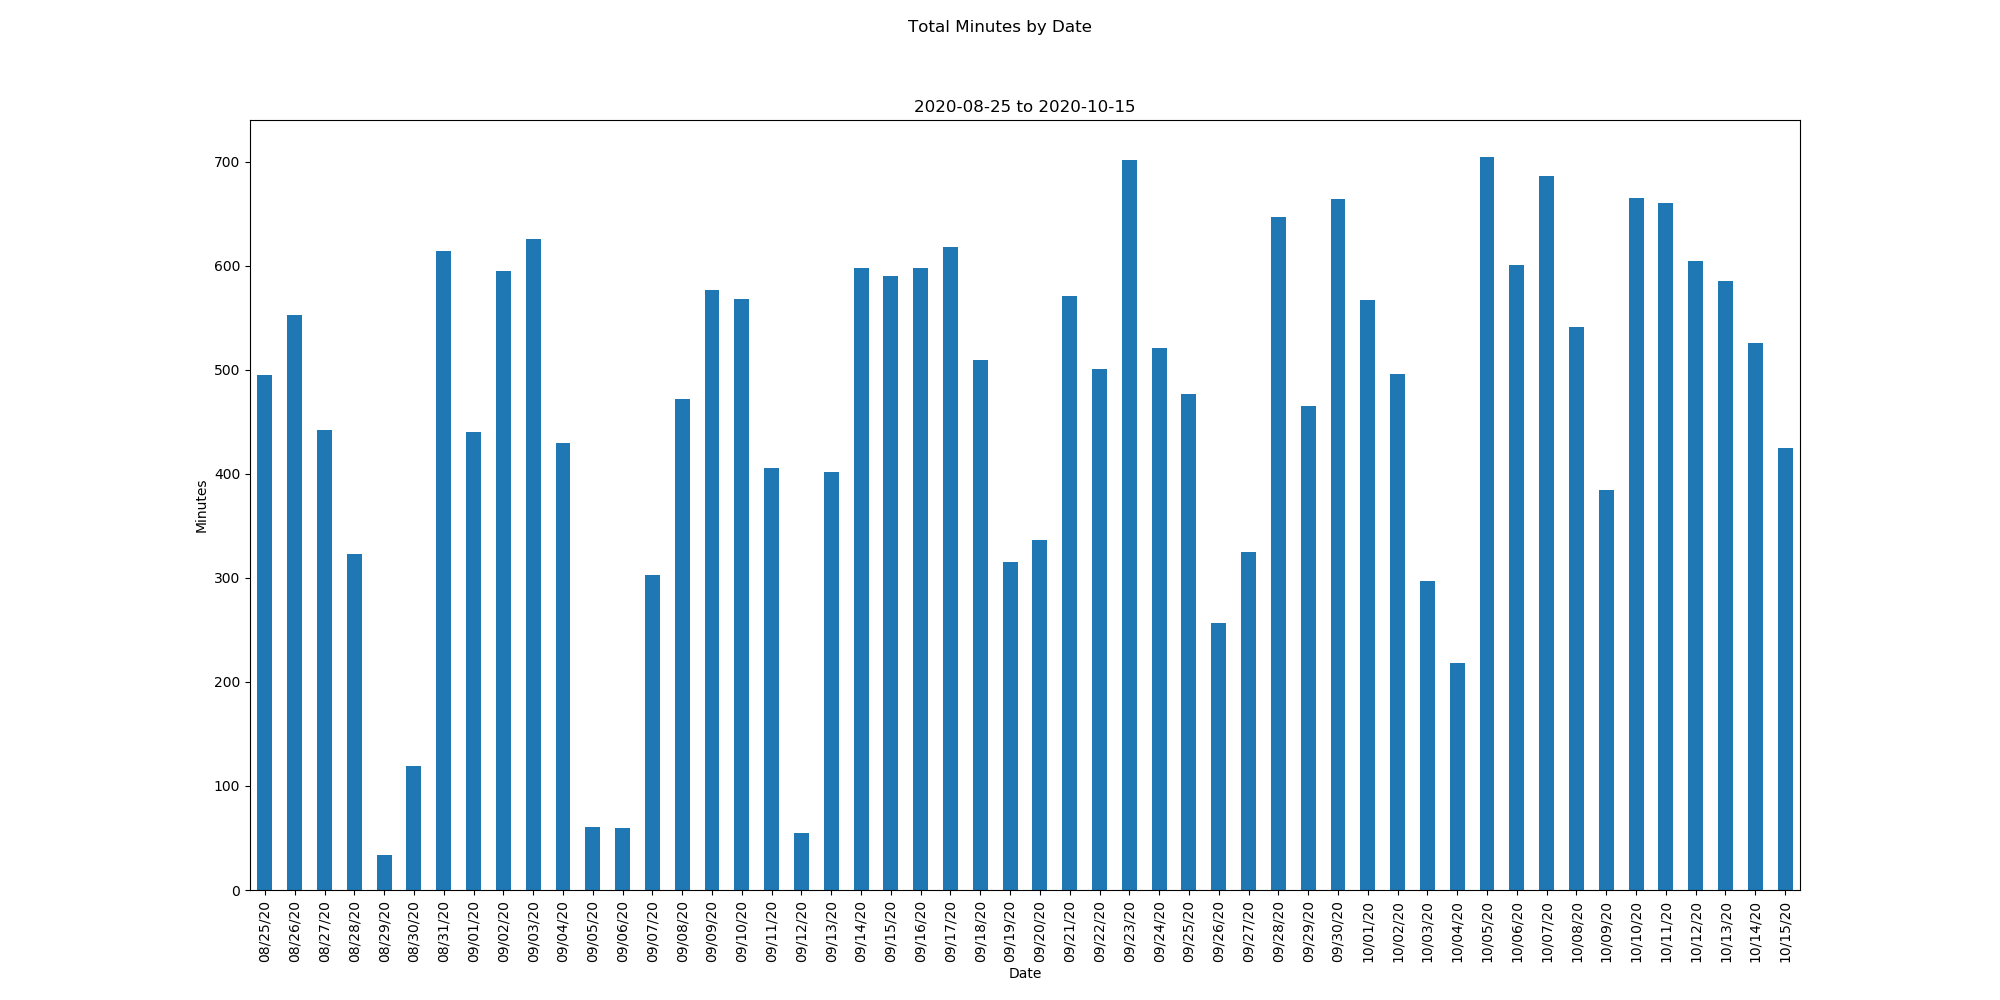

In [24]:
df_date.plot.bar(legend = False, figsize = (20,10))
plt.suptitle('Total Minutes by Date')
plt.title(date_rangestr)
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.savefig('1total_date.png')

In [25]:

cat_date = df.pivot_table(['Anki','Class','Lab','Research','Volunteering','Other','Self-Study'], index = x)
cat_date.tail()


,Anki,Class,Other,Research,Self-Study
d,,,,,
10/11/20,81.0,NaN,NaN,NaN,579.0
10/12/20,109.0,170.0,NaN,NaN,326.0
10/13/20,60.0,NaN,NaN,NaN,525.0
10/14/20,141.0,240.0,NaN,NaN,145.0
10/15/20,65.0,30.0,NaN,NaN,330.0


In [26]:
#descriptive statistics for last 7 days
last_7_2 = cat_date.tail(7)
b = last_7_2.mean()

<IPython.core.display.Javascript object>


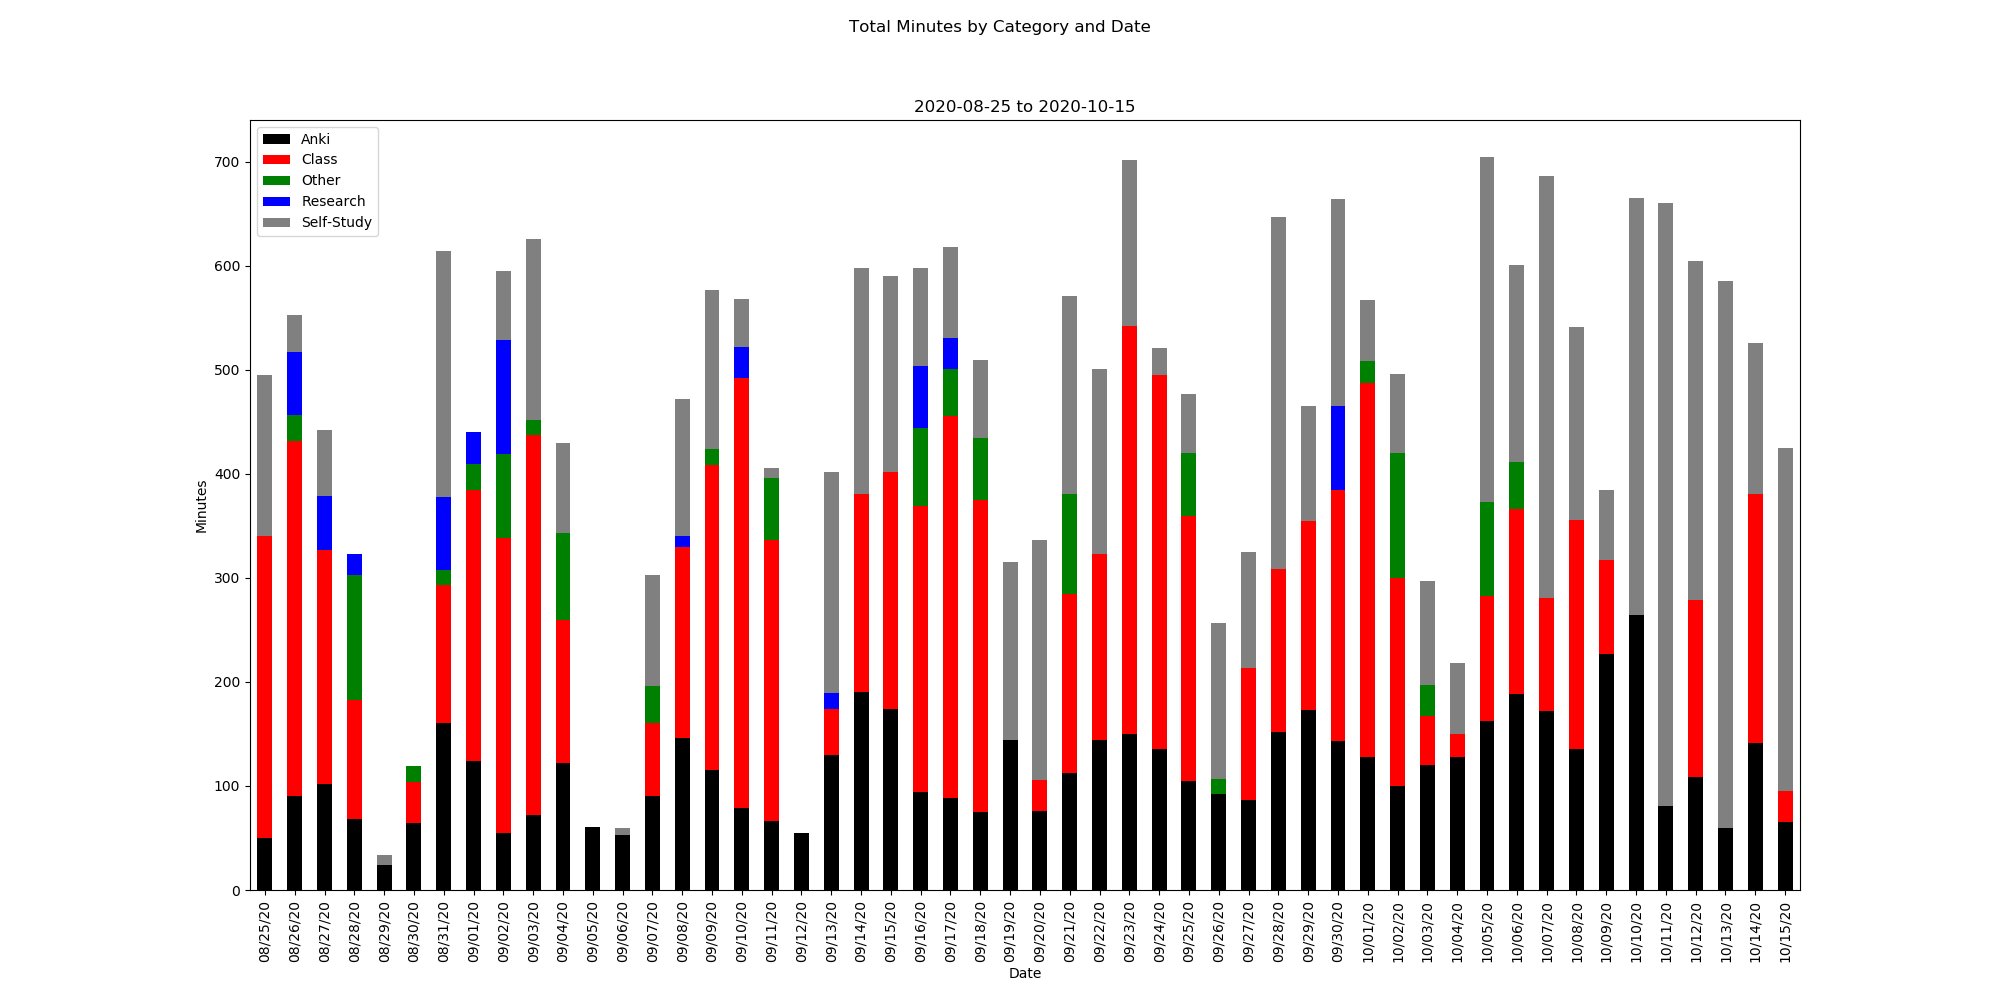

In [27]:
cat_date.plot.bar(stacked = True, figsize = (20,10), color=['black', 'red', 'green', 'blue', 'grey', 'purple', 'orange'])
plt.suptitle('Total Minutes by Category and Date')
plt.title(date_rangestr)
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.savefig('1cat_date.png')

In [28]:
#drop sum from rows to set up for descriptive stats
cat_year1.drop('Sum', axis = 1)
cat_month1 = cat_month1.drop('Sum', axis = 1)


In [29]:
df1 = df
df1.tail()

,Timestamp,d,Class,Lab,Anki,Volunteering,Research,Other,Self-Study,Dow,Month,Year,Sum
Date,,,,,,,,,,,,,
2020-10-11,10/11/2020 21:22:21,2020-10-11,NaN,NaN,81.0,NaN,NaN,NaN,579.0,6,10,2020,660.0
2020-10-12,10/13/2020 12:03:58,2020-10-12,170.0,NaN,109.0,NaN,NaN,NaN,326.0,0,10,2020,605.0
2020-10-13,10/14/2020 7:17:05,2020-10-13,NaN,NaN,60.0,NaN,NaN,NaN,525.0,1,10,2020,585.0
2020-10-14,10/14/2020 20:03:08,2020-10-14,240.0,NaN,141.0,NaN,NaN,NaN,145.0,2,10,2020,526.0
2020-10-15,10/15/2020 21:14:14,2020-10-15,30.0,NaN,65.0,NaN,NaN,NaN,330.0,3,10,2020,425.0


In [30]:
#split data by week

df1 = df1.reset_index()
df1['Sum'] = df1['Sum'] / 60
y = df1.groupby(df1.d.dt.strftime('%W')).Sum.sum()
df2 = pd.DataFrame(y)
df2

,Sum
d,
34,32.766667
35,47.100000
36,46.383333
37,59.416667
38,55.900000
39,55.900000
40,70.716667
41,35.683333


In [31]:
row_num = int(len(df2.index))
df2 = df2.reset_index()
df2.drop(['d'], axis = 1)


,Sum
0,32.766667
1,47.100000
2,46.383333
3,59.416667
4,55.900000
5,55.900000
6,70.716667
7,35.683333


<IPython.core.display.Javascript object>


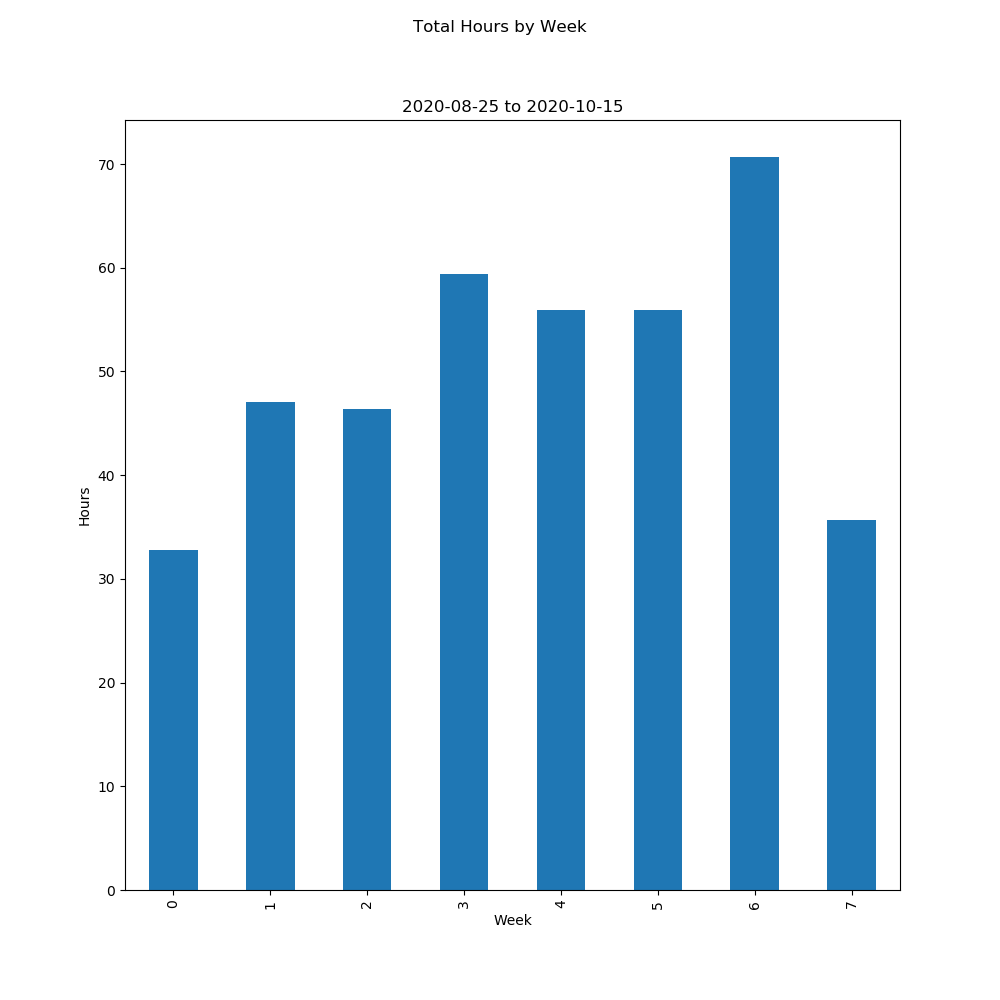

In [32]:
df2.plot.bar(legend = False,figsize = (10,10))
plt.suptitle('Total Hours by Week')
plt.title(date_rangestr)
plt.xlabel('Week')
plt.ylabel('Hours')
plt.savefig('1week_sum.png')

In [33]:

#descriptive statistics 
def desc_stats():

    #total average time per day
    ave_dayz = df_date
    q = ave_dayz['Sum'].sum() / 60 / dayz
    
    #for last 7 days
    last_7_1 = df_date.tail(7)
    a = last_7_1['Sum'].mean()
    c = last_7_1['Sum'].sum()/60
    last_7_2 = cat_date.tail(7)
    b = last_7_2.mean()
    d = last_7_2.sum()/60
    last_30_1 = df_date.tail(30)
    last_30_2 = cat_date.tail(30)
    k = last_30_1['Sum'].mean()
    l = last_30_1['Sum'].sum()/60
    m = last_30_2.mean()
    n = last_30_2.sum()/60

    #for total time
    e = df_month.sum(axis = 1)
    f = df_year.sum(axis = 1)
    df_dow2 = df_dow / 60
    g = df_dow2.sum(axis = 1)


    # by category 
    h = cat_month1 / 60
    i = cat_year1 / 60
    j = cat_dow1 / 60
    
    #average time per week
    o = df2["Sum"].mean()

    print('Report from', date_rangestr, 
          '\nNumber of Days', dayz,
         '\nAverage time per day in hours', q)
    print('\n\nAverage hours per week\n',o,
          '\n\nSum of time in last 7 days (hours)\n',c, 
          '\n\nAverage time per day in last 7 days (minutes) \n', a,
          '\n\nSum of time by category in last 7 days (hours)\n', d,
          '\n\nAverage time per day by category in last 7 days (minutes)\n',b,
          '\n\nSum of time in last 30 days (hours)\n', l,
          '\n\nAverage time per day in last 30 days (minutes) \n', k,
          '\n\nSum of time by category in last 30 days (hours)\n', n,
          '\n\nAverage time per day by category in last 30 days (minutes)\n',m,
          '\n\n Total time in hours by\n', g,
          '\n\n Total time in hours by\n', e,
          '\n\n Total time in hours by\n', f,
          '\n\n Total time for day of week by category in hours\n', j,
          '\n\n Total time for month by category in hours\n', h,
          '\n\n Total time for year by category in hours\n', i)
desc_stats()

Report from 2020-08-25 to 2020-10-15 
Number of Days 52 
Average time per day in hours 7.766666666666667


Average hours per week
 50.48333333333333 

Sum of time in last 7 days (hours)
 64.18333333333334 

Average time per day in last 7 days (minutes) 
 550.1428571428571 

Sum of time by category in last 7 days (hours)
 Anki          15.783333
Class          8.833333
Other          0.000000
Research       0.000000
Self-Study    39.566667
dtype: float64 

Average time per day by category in last 7 days (minutes)
 Anki          135.285714
Class         132.500000
Other                NaN
Research             NaN
Self-Study    339.142857
dtype: float64 

Sum of time in last 30 days (hours)
 257.81666666666666 

Average time per day in last 30 days (minutes) 
 515.6333333333333 

Sum of time by category in last 30 days (hours)
 Anki          64.200000
Class         80.400000
Other         10.966667
Research       2.833333
Self-Study    99.416667
dtype: float64 

Average time per day by ca